# Reducing Commercial Aviation Fatalities with Machine Learning (XGBoost)

<img src="https://i.imgur.com/GzwXNbG.jpeg" style="width: 800px;" align="center"/>


Most aviation-related fatalities stem form a loss of "airplane state awareness". Lack of awareness can be because of distractions, sleepy or other dangerous cognitive states (1). The goal of this project is to detect abberations is the attention span of aircrews based on their physiological data collected from test situations. This can then help develop measures to pre-empt dangerous cognitive states. The data for this project is from the former Kaggle competition - 'Reducing Commercial Aviation Fatalities' topic on the Kaggle platform. The machine learning problem in this project is identified as a classification problem. Therefore logistic regression, decision tree classifier, random forest classifier and XGB Classifier models were built and tested for accuracy.

## <font color=brown>1. Introduction

Commercial aviation is widely regarded as the safest mode of transport. Yet, fatal incidents are not uncommon - owing to several factors. Numerous analyses were done on aviation fatalities and their causes. Most of these analyses pointed to pilot error as the leading cause of a fatal aviation incident (2), (3), (4).

Human error can be caused by mental factors such as distraction, improper judgement, lack of training or other factors like cockpit intrusion and so on. In this project, the goal is to predict when an airline pilot gets into a distractive mental state.
    
To solve this problem with machine learning, several models are built and tested. Specific hyperparameters for each type of model are tuned to further improve accuracy. The evaluation metric for this problem is 'multiclass log loss' which can be calculated using functions in the sklearn library.

Let's install the Jovian library. We can use jovian.commit() to save our work periodically. 

In [4]:
!pip install jovian --upgrade --quiet

In [5]:
import jovian

In [6]:
# Execute this to save new versions of the notebook
jovian.commit(project="project-3-machine-learning-reducing-commercial-aviation-fatalities")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities


'https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities'

The way this problem is addressed is as follows:
- Install all the libraries and import packages that might be required.
- Download the data sets from Kaggle. This project has raw and test datasets.
- Perform exploratory data analysis (EDA) and feature engineering if required on the datasets.
- Split the raw dataset into train and validation datasets.
- Train models with the training datasets and get the accuracy score or in this case log loss. Because this is a multiclass log loss classification problem, some of the models that can be chosen are logistic regression, decisiontree classifier, randomforest classifier or XGB classifier. In this project, we will explore all of them to varying levels of complexity. 
- Apply the model to the validation dataset and check the log loss.
- Tune hyperparameters if the model has overfitted to the training dataset. Once the errors for training and validation dataset are similar, apply the model to the test dataset and get the predictions for each of the test row. 
- Submit the test predictions to kaggle and see how the score and rankings are. If the ranking is not in the top 30%, tune hyperparams to reduce the errors as much as possible, or, pick a different ML model. 

## <font color=brown> 2. Install the required libraries and import packages

Let's install the libraries and packages which might be needed for downloading the datasets, performing EDA and building ML models. We will use numpy, pandas, matplotlib and seaborn for data analysis. For machine learning, the scikitlearn package would be used.

In [4]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet --user

In [5]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade --user

In [6]:
#opendatasets
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## <font color=brown> 3. Download the dataset from kaggle and check the contents of the downloads

The opendatasets package is used for downloading data from Kaggle. Kaggle username and key are required for downloading. 

In [7]:
#use the opendatasets package to download the files
od.download('https://www.kaggle.com/c/reducing-commercial-aviation-fatalities/data', force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: tejasvisadasivuni
Your Kaggle Key: ········


  0%|          | 3.00M/2.13G [00:00<01:23, 27.4MB/s]

100%|██████████| 2.13G/2.13G [00:24<00:00, 94.8MB/s]



Extracting archive .\reducing-commercial-aviation-fatalities/reducing-commercial-aviation-fatalities.zip to .\reducing-commercial-aviation-fatalities


In [8]:
#check the current working directory:
os.getcwd()

'C:\\Users\\sadas\\Downloads\\project-3-machine-learning-reducing-commercial-aviation-fatalities\\project-3-machine-learning-reducing-commercial-aviation-fatalities-v-45'

In [9]:
# check the contents of the downloaded package using os.listdir
os.listdir('reducing-commercial-aviation-fatalities')

['sample_submission.csv', 'test.csv', 'train.csv']

In [10]:
train_size = os.path.getsize(r"reducing-commercial-aviation-fatalities\train.csv")
test_size = os.path.getsize(r"reducing-commercial-aviation-fatalities\test.csv")
print("The training data file size is: {} MB.".format(round(train_size/(1024*1024), 3)))
print("The test data file size is: {} MB.".format(round(test_size/(1024*1024), 3)))

The training data file size is: 1177.563 MB.
The test data file size is: 4564.54 MB.


- The files are in the gigabyte size range. 
- Using the files as a whole to train and test models will take considerable amounts of time while making very little progress. 
- A random fraction of training file (reproducible with a random seed) must therefore be chosen for modeling.
- The test.csv file must remain intact so that we can generate the predictions for all rows and submit to Kaggle for scoring.

In [11]:
#import random to help generate random number
import random

In [12]:
# to sample 10% of the data in train.csv:
sample_frac = 0.1

In [13]:
random.seed(42)
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

Let's call the train.csv file as raw_df. This is because the raw_df will be used to create training and validation datasets later. 

In [14]:
raw_df = pd.read_csv(r'reducing-commercial-aviation-fatalities\train.csv', skiprows=skip_row)

In [15]:
test_df = pd.read_csv(r'reducing-commercial-aviation-fatalities\test.csv')

## <font color=brown> 4. EDA on the datasets

Performing exploratory data analysis on the raw and test datasets is critical to building an accurate model. It helps us understand the features, ranges and aspects of the data that will be needed later for tuning the model. 

In [16]:
#check the size of raw_df and test_df
print("The 'raw_df' has {} rows and {} columns.".format(raw_df.shape[0], raw_df.shape[1]))
print("The 'test_df' has {} rowsand {} columns.".format(test_df.shape[0], test_df.shape[1]))

The 'raw_df' has 487607 rows and 28 columns.
The 'test_df' has 17965143 rowsand 28 columns.


Looks like the 'raw_df' and 'test_df' have the same number of columns. 

That does not look right because we need to predict the output column for the test_df! Let's check more INFO on the columns:

In [17]:
# Use the .info() method ot get a summary of the column names, non-null counts and the datatype of each of the columns
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487607 entries, 0 to 487606
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   crew        487607 non-null  int64  
 1   experiment  487607 non-null  object 
 2   time        487607 non-null  float64
 3   seat        487607 non-null  int64  
 4   eeg_fp1     487607 non-null  float64
 5   eeg_f7      487607 non-null  float64
 6   eeg_f8      487607 non-null  float64
 7   eeg_t4      487607 non-null  float64
 8   eeg_t6      487607 non-null  float64
 9   eeg_t5      487607 non-null  float64
 10  eeg_t3      487607 non-null  float64
 11  eeg_fp2     487607 non-null  float64
 12  eeg_o1      487607 non-null  float64
 13  eeg_p3      487607 non-null  float64
 14  eeg_pz      487607 non-null  float64
 15  eeg_f3      487607 non-null  float64
 16  eeg_fz      487607 non-null  float64
 17  eeg_f4      487607 non-null  float64
 18  eeg_c4      487607 non-null  float64
 19  ee

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965143 entries, 0 to 17965142
Data columns (total 28 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   crew        int64  
 2   experiment  object 
 3   time        float64
 4   seat        int64  
 5   eeg_fp1     float64
 6   eeg_f7      float64
 7   eeg_f8      float64
 8   eeg_t4      float64
 9   eeg_t6      float64
 10  eeg_t5      float64
 11  eeg_t3      float64
 12  eeg_fp2     float64
 13  eeg_o1      float64
 14  eeg_p3      float64
 15  eeg_pz      float64
 16  eeg_f3      float64
 17  eeg_fz      float64
 18  eeg_f4      float64
 19  eeg_c4      float64
 20  eeg_p4      float64
 21  eeg_poz     float64
 22  eeg_c3      float64
 23  eeg_cz      float64
 24  eeg_o2      float64
 25  ecg         float64
 26  r           float64
 27  gsr         float64
dtypes: float64(24), int64(3), object(1)
memory usage: 3.7+ GB


There! The test_df has an 'id' column but no 'event' column. The raw_df has an 'event' column. So looks like we need to predict the 'event' for test_df!
Also, neither the raw_df nor test_df have any null values. Imputation can be avoided.. phew!

Let's get a sample of the datasets to see what the data looks like:

In [19]:
raw_df.sample(5)

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
472780,13,SS,161.315002,0,18.268400,17.21410,-0.328238,34.307598,84.379303,-12.15490,12.38060,27.628099,-8.836860,2.39252,5.572200,-34.968399,3.984820,21.266500,11.373500,24.251699,5.447850,6.72951,7.654910,0.23859,-13791.700195,671.607971,531.179016,A
60536,2,CA,54.785156,1,32.809700,6.44924,25.202801,15.908800,2.073260,2.74796,3.31775,44.315701,7.121830,3.52492,10.473000,10.331200,18.660299,24.938101,15.532800,11.523700,6.832490,9.89822,9.334970,3.15015,6955.370117,818.067017,1771.349976,C
265165,5,SS,71.051003,0,0.257712,7.80897,-9.838950,-3.025860,-1.424200,6.65350,8.17649,-2.229670,3.933020,6.47332,3.756240,1.852670,3.232310,6.935370,5.208230,3.194260,1.987160,4.42751,0.200107,1.03327,-1528.050049,654.614014,1490.579956,A
212696,5,CA,131.053009,0,-7.114400,-6.25069,-1.397700,-8.636790,-18.163900,-11.64770,-25.19890,-3.374070,23.791201,9.71383,1.934820,-2.356470,-0.448721,14.637200,11.642900,1.579040,6.113390,3.25096,3.985470,-1.10930,-2321.649902,659.039978,1342.689941,C
52618,2,CA,237.886017,0,-1.227420,-15.70830,-10.765600,-8.257480,-15.369100,-12.20840,-10.32340,-5.052400,-19.863400,-22.40440,-29.569099,-9.878220,-21.729000,-14.518400,-16.418301,-24.967600,-24.232401,-17.86260,-24.310900,-29.64160,-4813.350098,736.916016,1340.599976,C


In [20]:
test_df.sample(5)

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
7877049,7877049,4,LOFT,3454.449219,1,11.110600,46.337898,6.103610,6.06618,11.099800,-10.993200,-1.918230,15.611800,-8.178680,-0.505577,-0.800747,2.931300,3.001070,-3.062410,-2.16594,-9.505770,-2.06933,-0.123169,2.90268,-5.409460,5265.149902,744.864990,446.579987
15890091,15890091,8,LOFT,611.070312,0,-0.798992,-0.925289,17.028500,-1.55212,-0.711494,0.698597,-3.038000,0.479256,2.561200,-4.054340,-3.423060,-12.089500,-0.783503,-12.495200,-5.09049,-0.988211,1.40476,-8.596190,-5.99799,5.522690,15065.599609,481.622009,742.054016
8803118,8803118,5,LOFT,1710.988281,0,18.349800,14.639600,-11.181600,-2.55472,26.843901,14.632000,-5.764490,0.838238,-6.446980,-4.912400,-26.330700,-70.723000,5.277140,0.877028,-10.51990,-14.055700,-4.67027,3.027460,-6.63047,-0.611465,-412.351990,623.593018,829.432007
12309546,12309546,6,LOFT,71.351562,0,4.666200,57.771198,-50.712601,-12.22460,16.347900,27.587799,47.113098,-17.007500,23.630501,20.449600,13.082200,186.302002,10.044200,-20.167999,-8.21093,11.306700,12.29380,18.580400,12.12640,26.528299,8098.069824,633.098022,1377.930054
10838336,10838336,6,LOFT,1451.359375,1,20.157000,5.443370,39.696602,31.04880,35.806599,-15.091300,0.144663,19.534201,11.574200,1.829010,10.936000,3.430620,26.388201,17.404100,12.26750,20.649599,4.53753,-7.008060,-1.95752,62.361301,2472.790039,793.711975,0.000000


Let's get a statistical summary of the datasets:

In [21]:
raw_df.describe()

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
count,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000,487607.000000
mean,5.538292,178.574076,0.500040,3.619243,1.247725,1.067574,-0.024052,0.024574,0.035336,0.136105,3.466319,0.148602,0.217196,0.457586,1.304364,1.081862,1.170275,0.543881,0.200439,0.153827,0.587473,0.407926,0.259456,5307.168924,737.643848,851.426006
std,3.406262,103.964974,0.500001,45.025868,35.148438,35.123319,24.467959,18.282602,18.555628,25.702135,45.695981,27.847932,17.032050,64.552066,43.115707,55.669423,41.918263,20.932077,17.020564,18.850227,20.160940,19.759537,24.887352,12152.045621,81.865884,503.986315
min,1.000000,0.006000,0.000000,-1359.060059,-1572.180054,-1494.000000,-1506.790039,-1205.760010,-1238.369995,-1255.469971,-1393.479980,-2504.899902,-1203.410034,-2851.090088,-1353.410034,-4064.070068,-1966.729980,-1212.030029,-1219.969971,-1213.040039,-1217.469971,-616.067017,-1154.219971,-18585.699220,482.071991,0.000000
25%,3.000000,88.527344,0.000000,-9.251055,-8.334615,-8.831295,-7.411855,-6.137595,-6.012595,-6.946065,-9.604115,-6.708310,-6.608015,-7.656605,-9.329570,-8.062900,-9.363165,-7.537320,-6.748200,-6.810120,-7.171100,-7.832845,-6.550600,-2534.000000,663.093506,524.152496
50%,5.000000,177.550781,1.000000,0.340661,0.028359,0.095843,0.000000,0.000000,0.000000,0.000000,0.365397,0.000000,0.000000,-0.007305,0.083459,0.070404,0.034924,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008515,5926.640137,756.150024,769.523010
75%,7.000000,268.609375,1.000000,10.259550,8.702675,9.259640,7.434570,6.138135,6.069445,7.037370,10.597650,6.748335,6.718230,7.782810,9.901955,8.591860,9.752975,7.729780,6.782150,6.889715,7.430540,7.973185,6.595780,10315.200195,813.471008,1196.265015
max,13.000000,360.335938,1.000000,1939.310059,2034.479980,2104.040039,1671.640015,883.831970,1164.449951,1414.489990,1998.069946,1775.520020,925.302979,2150.330078,1340.819946,3781.340088,2019.760010,877.098022,887.572021,1375.829956,918.585022,600.362000,2442.409912,34188.300781,840.041992,1999.680054


The datasets contain physiological data - including eeg, respiration, ecg and the galvanic skin response for each pilot. The crew column indicates crew ids which the pilots were a part of. The seat column indicates whether the pilot was seated in the left or right seat. 

In [22]:
#describe test_df without selecting the id column:
test_df[test_df.columns[1:]].describe()

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
count,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07,1.796514e+07
mean,5.240582e+00,1.972621e+03,4.999695e-01,5.938414e+00,2.650973e+00,1.394608e+00,-2.414278e-01,9.435666e-01,2.230059e-01,9.930397e-02,5.802513e+00,2.728602e-01,3.447749e-01,1.092883e+00,2.844347e+00,2.074748e+00,2.184743e+00,7.814546e-01,6.700656e-01,4.256035e-01,5.576686e-01,7.568577e-01,4.520155e-01,-9.111332e+02,7.190908e+02,5.244439e+02
std,3.408746e+00,1.168732e+03,5.000000e-01,1.838633e+02,1.746916e+02,1.739371e+02,1.652322e+02,1.992847e+02,1.665552e+02,1.665758e+02,1.879544e+02,3.334690e+02,1.615629e+02,2.549779e+02,2.589385e+02,1.935012e+02,2.900524e+02,1.845055e+02,1.864125e+02,1.707450e+02,1.786292e+02,1.333334e+02,3.107911e+02,8.171478e+03,9.460316e+01,3.976291e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-4.629900e+03,-4.635800e+03,-4.629850e+03,-4.632290e+03,-4.641780e+03,-4.619530e+03,-4.640100e+03,-4.636210e+03,-4.429080e+03,-4.632520e+03,-4.594870e+03,-4.622300e+03,-4.539690e+03,-4.601460e+03,-4.637070e+03,-4.626480e+03,-4.617690e+03,-4.627590e+03,-4.203440e+03,-4.587210e+03,-2.736110e+04,3.885490e+02,0.000000e+00
25%,2.000000e+00,9.746914e+02,0.000000e+00,-2.105640e+01,-1.958760e+01,-1.974340e+01,-1.629735e+01,-1.327720e+01,-1.275970e+01,-1.571870e+01,-2.135250e+01,-1.396020e+01,-1.264190e+01,-1.601620e+01,-2.172190e+01,-1.881110e+01,-1.893810e+01,-1.544170e+01,-1.371620e+01,-1.327470e+01,-1.477350e+01,-1.454890e+01,-1.349700e+01,-6.880760e+03,6.509890e+02,2.349480e+02
50%,5.000000e+00,1.949363e+03,0.000000e+00,8.436010e-01,2.468260e-01,4.586300e-01,1.185930e-01,1.608800e-02,1.115720e-01,7.458500e-02,9.312210e-01,4.880000e-04,1.853490e-01,1.245100e-02,7.603940e-01,6.320900e-01,1.558840e-01,1.821290e-01,4.880000e-04,2.937500e-02,3.145430e-01,3.300350e-01,0.000000e+00,-1.004990e+02,7.386020e+02,5.044570e+02
75%,7.000000e+00,2.924035e+03,1.000000e+00,2.475940e+01,2.129610e+01,2.182585e+01,1.684330e+01,1.372060e+01,1.345290e+01,1.640730e+01,2.507050e+01,1.479120e+01,1.374230e+01,1.721280e+01,2.609240e+01,2.239550e+01,2.201220e+01,1.686180e+01,1.429600e+01,1.378220e+01,1.641400e+01,1.590850e+01,1.453310e+01,4.892910e+03,8.008180e+02,7.752860e+02
max,1.300000e+01,4.917688e+03,1.000000e+00,4.751060e+03,4.637460e+03,4.756000e+03,4.729170e+03,4.744630e+03,4.713360e+03,4.735700e+03,4.725540e+03,4.423200e+03,4.726600e+03,4.613180e+03,4.704970e+03,4.563680e+03,4.693910e+03,4.463620e+03,4.715030e+03,4.720820e+03,4.714340e+03,4.069740e+03,4.253070e+03,3.820110e+04,8.302940e+02,2.000000e+03


<AxesSubplot:xlabel='experiment', ylabel='count'>

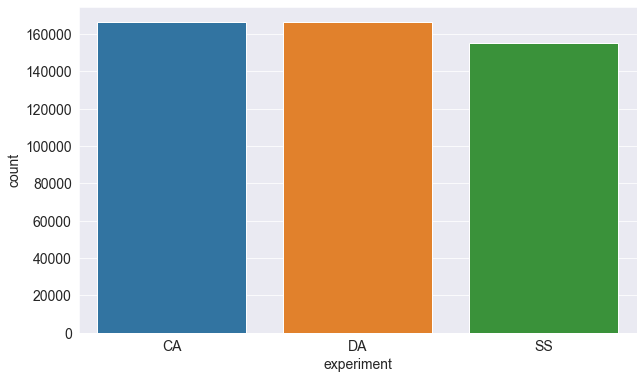

In [23]:
#check the number of experiments for each type in the raw_df
sns.countplot(x=raw_df['experiment'])

<AxesSubplot:xlabel='experiment', ylabel='count'>

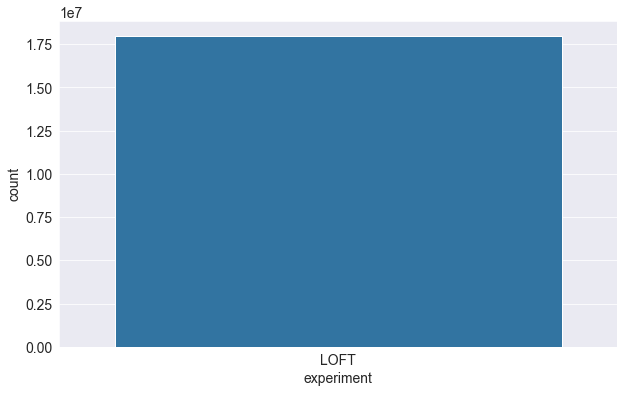

In [24]:
#check experiments in the test_df
sns.countplot(x=test_df['experiment'])

The experiments are not clasified in the test dataset. This means, we purely need to look at the physiological data to predict the outcome of each experiment. 

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities


'https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities'

In [26]:
#let's sample raw_df again so we can have a closer reference to the next set of analyses
raw_df.sample(5)

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
407260,8,DA,296.476562,1,-5.40652,-13.00700,-13.26190,-11.83990,-8.08537,-11.33510,15.56290,-10.29510,-10.399100,-12.82570,-4.10385,-58.461102,-2.84150,-5.07538,-2.67346,-3.52382,-8.72267,-3.40975,-4.124700,-2.888420,-864.867981,802.942017,638.294983,A
277788,6,CA,293.863281,0,-2.22745,-4.78617,-1.27086,2.33649,-3.28244,-3.50874,-3.76103,-2.66809,-3.439510,-5.28080,-3.56350,-3.153320,-3.93043,-5.31763,-7.14896,-4.43561,-7.45266,-4.91769,-8.843420,-9.724860,31398.599609,657.104004,1146.949951,C
41922,1,SS,48.773438,1,-7.73090,-2.66774,-17.49560,2.00441,-3.37258,-10.76980,-14.46420,-9.15093,8.192870,-7.49394,26.63180,-5.482480,-27.10980,-6.31974,-4.67267,2.63147,6.68443,-9.78629,-100.137001,22.300400,-4719.770020,819.674011,439.484009,A
454257,13,DA,162.488281,1,-6.27896,-3.78440,-8.52103,-5.47699,-6.43411,2.72955,2.34926,-11.50020,-16.967899,-11.71950,-19.27940,-4.597760,-14.53600,-6.58846,-14.36460,-16.30600,-17.77290,-8.09707,-13.721900,-18.200701,-8361.209961,807.382996,785.659973,A
384041,8,CA,212.226013,0,-6.20523,-5.16602,-9.77250,-11.64380,-8.07174,-4.62178,-3.86584,-12.24180,-1.814900,-6.30003,-6.83875,-9.963220,-10.27840,-6.17163,-15.20320,-8.42406,-7.40819,-8.66948,-10.281700,-2.957190,28129.900391,673.974976,1586.930054,C


Let's look at the physiological data in the raw_df and test_df. For that, first we assign all the physiological features to a variable 'physio_features'.

In [27]:
physio_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2", 'ecg', 'r', 'gsr']

For such a varied number of physiological features, it is best to use subplots to understand data ranges for each of the parameters.

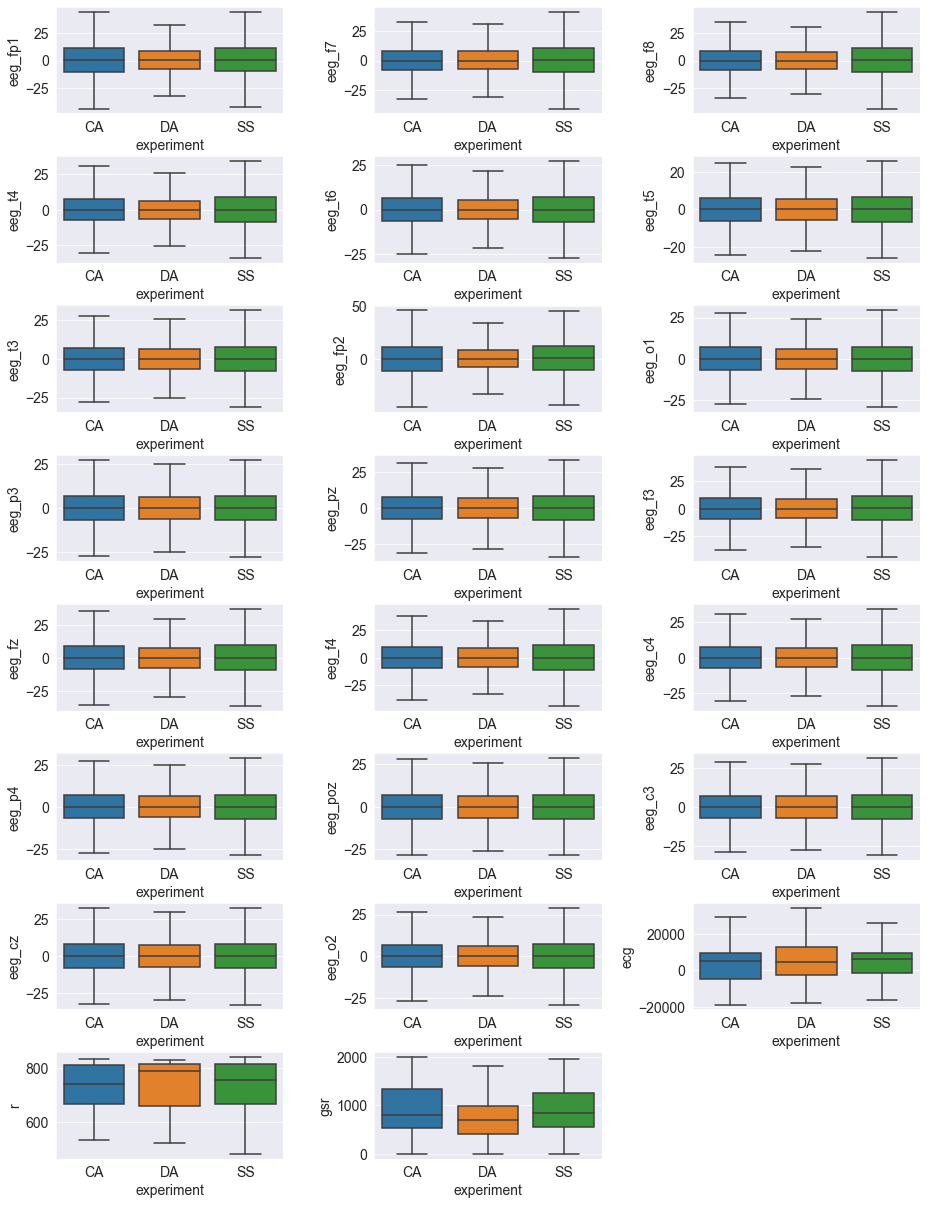

In [28]:
# reference: (12) 
# check raw_df physiological features:
plt.figure(figsize=(15, 20))
i = 0

for phy in physio_features:
    i+= 1
    plt.subplot(8, 3, i)
    sns.boxplot(x='experiment', y=phy, data=raw_df, showfliers=False)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


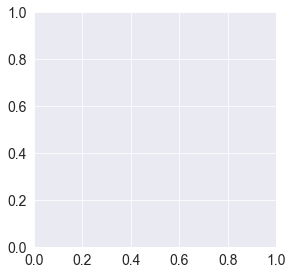

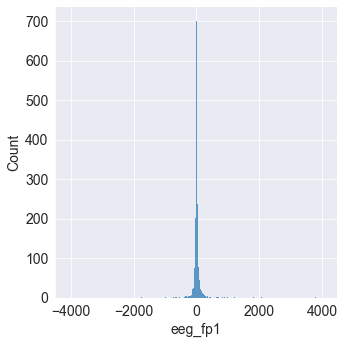

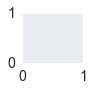

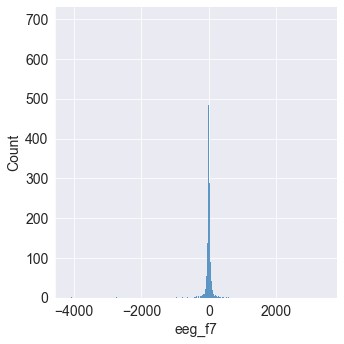

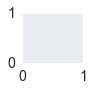

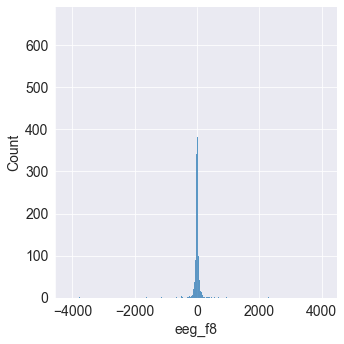

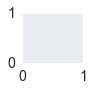

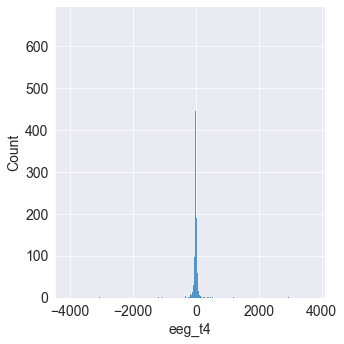

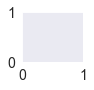

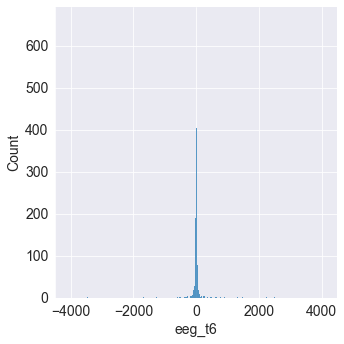

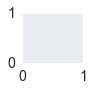

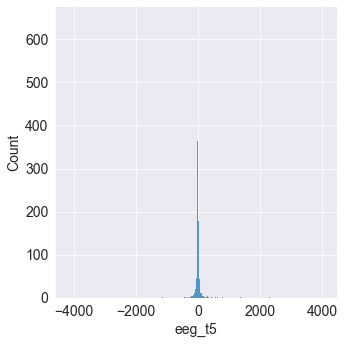

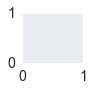

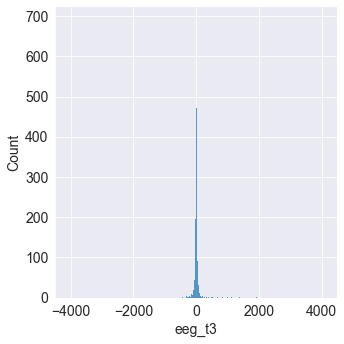

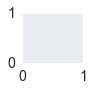

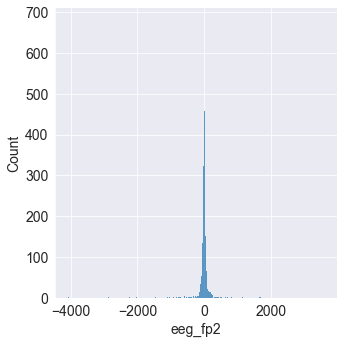

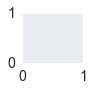

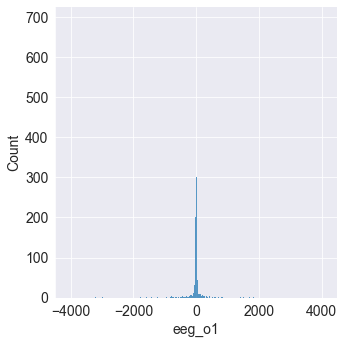

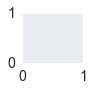

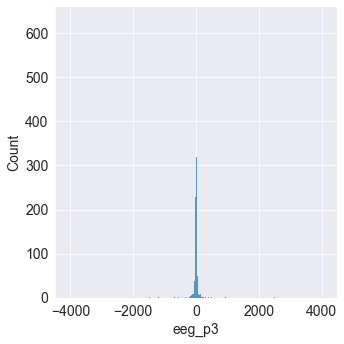

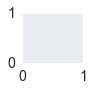

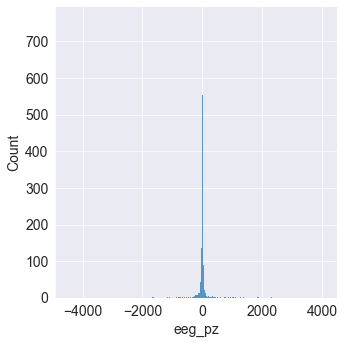

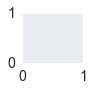

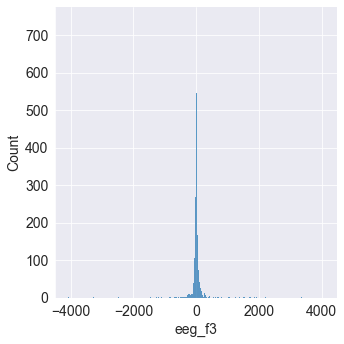

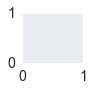

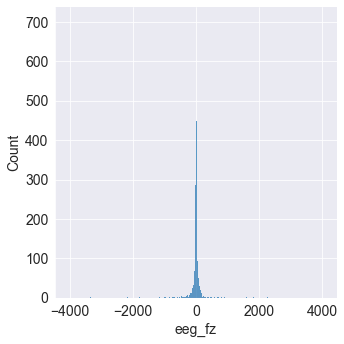

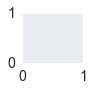

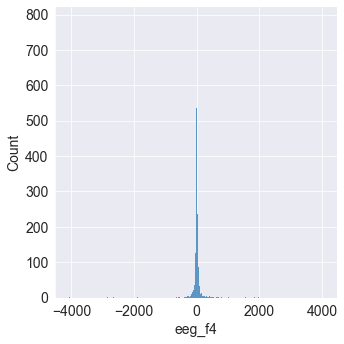

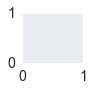

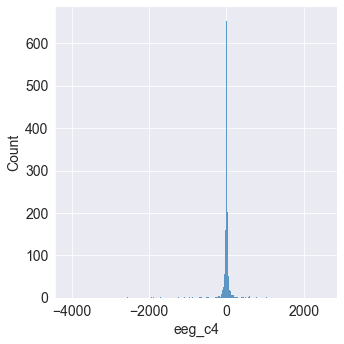

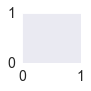

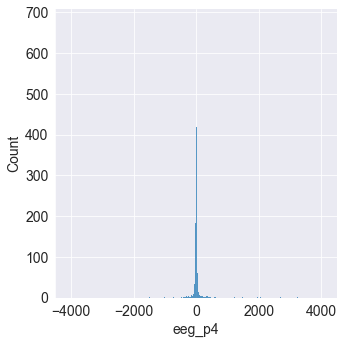

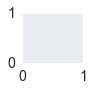

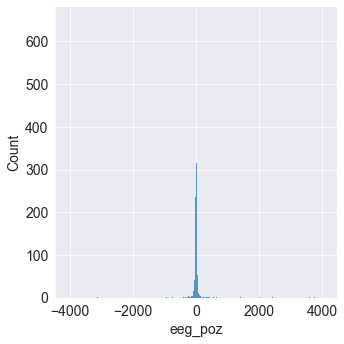

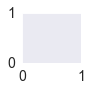

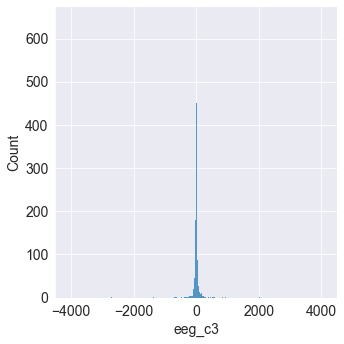

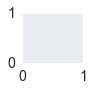

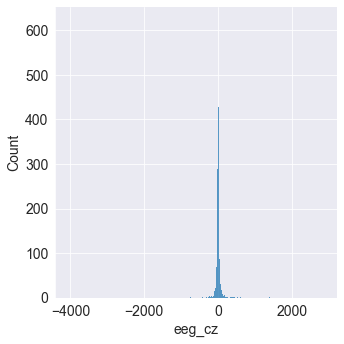

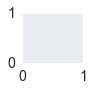

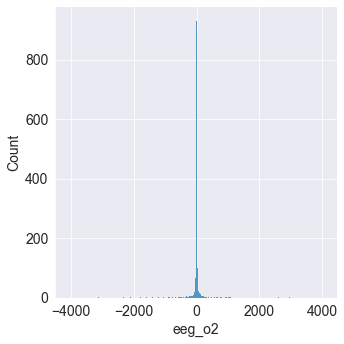

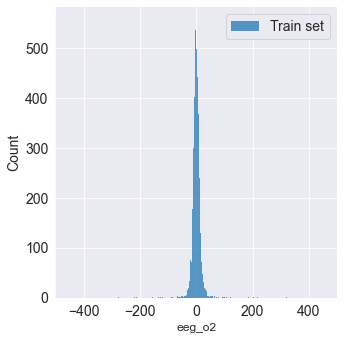

In [29]:
# reference: (12) 

eeg_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", 
                "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"]

plt.figure(figsize=(20,25))
plt.title('Eeg features distributions')
i = 0

for eeg in eeg_features:
    i += 1
    plt.subplot(5, 4, i)
    sns.displot(test_df.sample(10000)[eeg], label='Test set')
    sns.displot(raw_df.sample(10000)[eeg], label='Train set')
    plt.xlim((-500, 500))
    plt.legend()
    plt.xlabel(eeg, fontsize=12)

plt.show()

In [30]:
test_df.sample(5)

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
5383790,5383790,3,LOFT,2389.535156,1,-51.982899,-18.898399,-25.249300,-19.430599,-3.384810,12.580800,-13.866000,-60.448898,-21.015301,-26.677900,109.844002,-8.111520,-37.749599,-23.415600,-23.802900,-17.288500,-24.461399,-23.626301,-29.188499,-18.254101,-88.756897,807.411011,322.872986
8505881,8505881,5,LOFT,1189.445312,1,-54.208698,-81.487701,-45.849300,-15.461500,-15.902000,-17.413099,-50.309101,-48.278000,-31.823601,-38.524200,-33.406101,-37.808701,-50.701698,-45.520901,-44.714401,-35.824299,-30.179800,-120.629997,-55.549702,-30.324100,5820.600098,789.901001,1111.479980
1634570,1634570,1,LOFT,3871.519531,0,53.592701,52.288601,17.693399,163.429993,113.065002,71.384499,123.424004,-8.278290,-21.306499,5.527430,-1.125630,6.199680,20.954599,22.685101,68.716698,20.065701,-11.007300,3.667140,-7.869970,7.465670,-11511.900391,610.440002,352.997009
11132841,11132841,6,LOFT,197.566406,0,73.384804,-38.077900,58.573898,10.052500,7.393160,3.405590,-55.702900,50.335800,9.608760,36.671001,-22.857500,-34.481201,62.019699,56.782200,41.082298,5.667000,15.852600,77.545097,38.822899,-13.070600,9005.419922,637.281982,689.940979
16781381,16781381,13,LOFT,2177.902344,1,-65.120399,-45.394901,-51.170799,-27.252100,8.076700,-4.677700,-38.329102,-73.927803,0.000000,-51.323399,-36.249599,-50.040501,-53.195202,-19.215401,-52.162300,-38.114700,-51.477200,-36.436699,-43.484402,-37.888901,-7340.430176,778.382019,591.943970


Because all experiments in test_df are labeled as LOFT, we cannot classify physiological data into different experiments. But we can check the ranges of each of the physiological parameters and see if they match up between the test_df and raw_df.

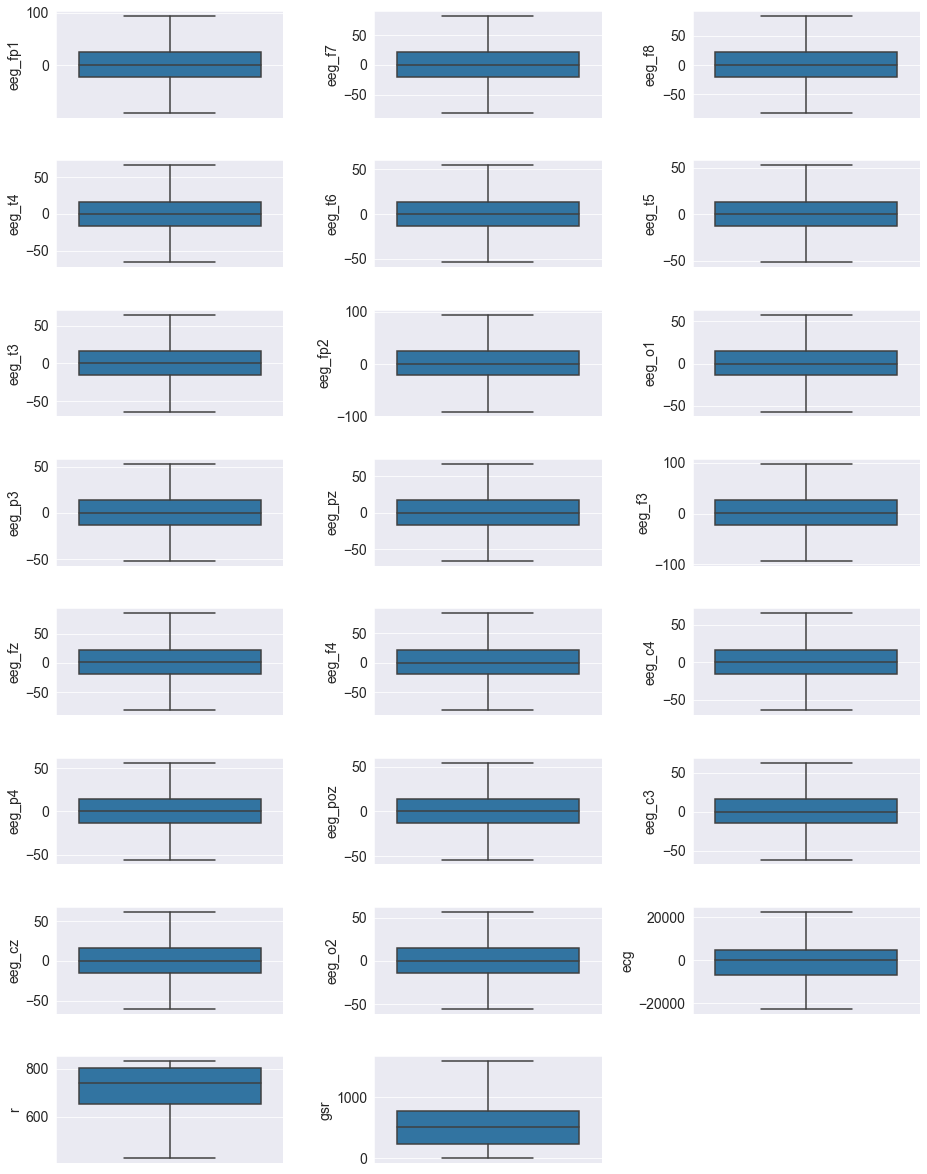

In [31]:
# check test_df physiological features:
plt.figure(figsize=(15, 20))
i = 0

for phy in physio_features:
    i+= 1
    plt.subplot(8, 3, i)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    sns.boxplot( y=phy, data=test_df.sample(500000), showfliers=False)
    
plt.show()

The ranges for the physiological data seem to be matching up between the raw and test_df. 

Let's look at the 'event' column in the raw_df. We can use the imported seaborn package for it.

<AxesSubplot:xlabel='event', ylabel='count'>

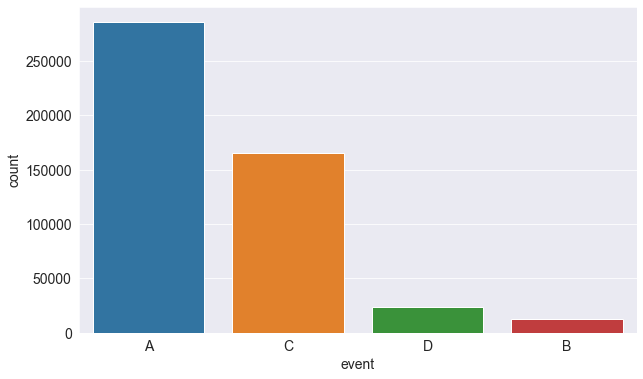

In [32]:
#check the event counts to see the distribution:
sns.countplot(x=raw_df['event'])

It appears that there are more rows with event: A, followed by C, then D and finally B. This shows that there is a class imbalance, which may skew our models when we train them. To address this issue, we can adopt a couple of strategies: adjust class weight or apply SMOTE to reduce class imbalance. We will adopt these strategies when we train our models. 

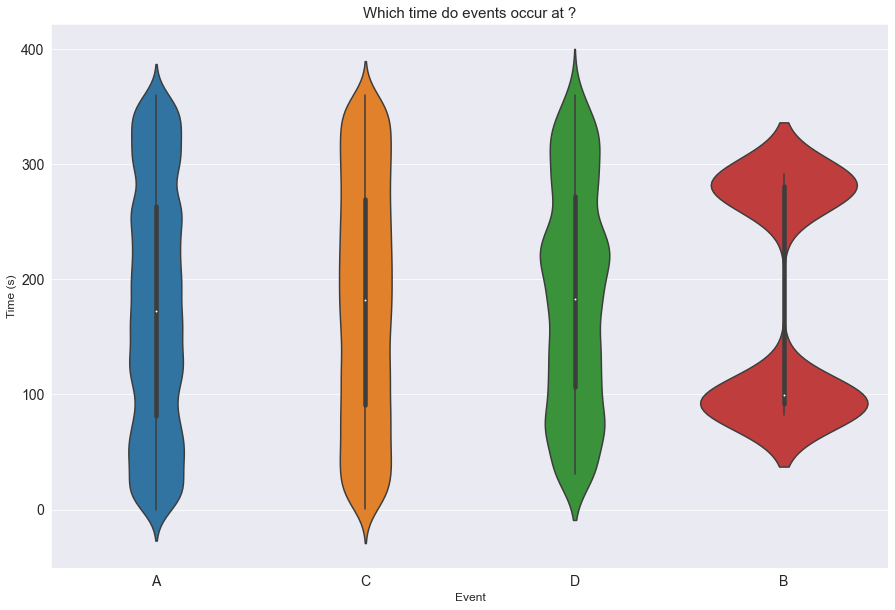

In [33]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='time', data=raw_df.sample(50000))
plt.ylabel("Time (s)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Which time do events occur at ?", fontsize=15)
plt.show()

In [34]:
raw_df[raw_df['event'] == 'A']['experiment'].unique()

array(['CA', 'DA', 'SS'], dtype=object)

In [35]:
raw_df[raw_df['event'] == 'B']['experiment'].unique()

array(['SS'], dtype=object)

In [36]:
raw_df[raw_df['event'] == 'C']['experiment'].unique()

array(['CA'], dtype=object)

In [37]:
raw_df[raw_df['event'] == 'D']['experiment'].unique()

array(['DA'], dtype=object)

Event 'A' indicates baseline values, i.e. the pilot did not experience any distraction at that point of time. Because the pilots did not experience distraction most of the time, the counts for 'A' are high. 

Event 'B' indicates the pilot was in a startled state at the time of recording. 

Event 'C' indicates the pilot was in a state of channelized attention at the time of recording.

Event 'D' indicates the pilot was in a state of diverted attention at the time of recording.

We can also conclude that when an experiment for channelized attention was conducted, the outcome could only be either baseline event = 'A' or 'CA' which stands for channelized attention. The same can be said for diverted attention and startling. 

Therefore, the experiment column is not required for our modeling, because it matches our 'event' column.

In [38]:
raw_df = raw_df.drop(columns = ['experiment'])

In [39]:
raw_df.sample(3)

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
375177,7,58.022003,1,-34.93700,-42.044102,-21.29550,-14.219700,4.95685,-1.11041,-67.60820,-11.73210,-38.691200,-10.78160,31.8860,55.057999,-20.459299,160.901993,-24.42590,-15.60260,-11.56900,-27.46740,-28.974001,-14.936300,18871.000000,819.880981,480.692993,A
431886,8,90.179688,1,9.88030,11.312000,7.82371,8.650260,4.40057,12.13140,15.72390,8.56886,9.664360,10.66120,13.0862,-32.293201,11.766600,5.197230,6.15649,4.92667,9.12193,11.70610,13.046200,1.338820,6478.520020,803.481018,1054.359985,B
40498,1,23.199219,1,7.63139,21.956499,-4.35581,0.357445,1.29810,-8.46859,3.42641,5.41802,0.973862,1.16199,-31.0767,0.743279,-113.852997,4.512250,5.22293,3.52429,8.16808,-2.64838,-75.605904,0.080696,-4652.109863,819.685974,538.096008,A


We can see that the 'experiment' column is no longer present in the raw_df.

Let's look at the time column and see how it is distributed across the raw_df (used for training and validation of the ML models) and test_df datasets.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


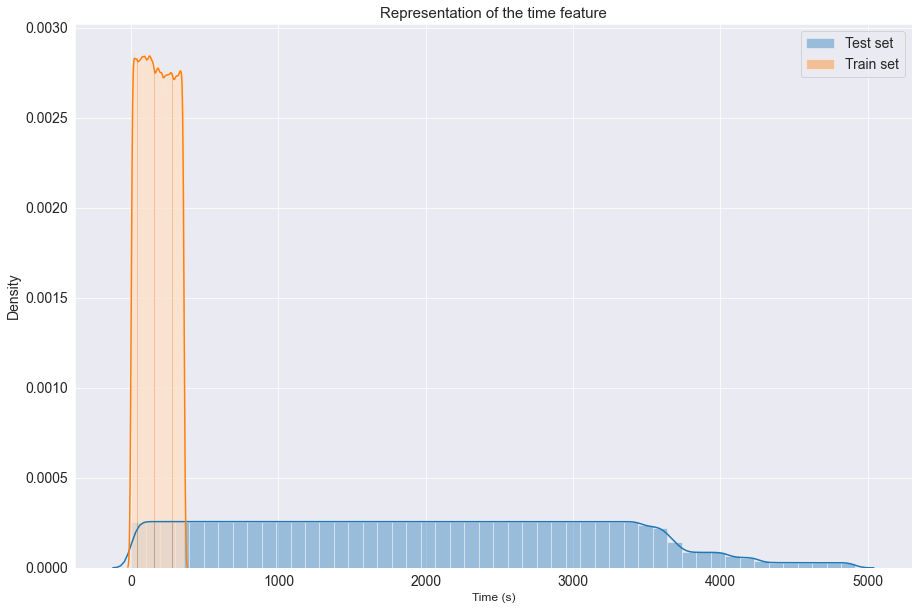

In [40]:
# reference: (12) 
plt.figure(figsize=(15,10))
sns.distplot(test_df['time'], label='Test set')
sns.distplot(raw_df['time'], label='Train set')
plt.legend()
plt.xlabel("Time (s)", fontsize=12)
plt.title("Representation of the time feature", fontsize=15)
plt.show()

We can see that the time column in the raw_df has values of only from 0 to less than 500 secs. But the test_df has time values all the way up to about 5000s. If we train a model with the time column in consideration, the model migh overfit to the large number of values in the limited time distribution, causing overfitting to the training / validation set, and reducing the overall accuracy of the model. Hence, it is advisable to skip the time column as well. 

In [41]:
#remove 'time' from input columns
input_cols = list(['eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4',
       'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz',
       'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3',
       'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr'])
input_cols

['eeg_fp1',
 'eeg_f7',
 'eeg_f8',
 'eeg_t4',
 'eeg_t6',
 'eeg_t5',
 'eeg_t3',
 'eeg_fp2',
 'eeg_o1',
 'eeg_p3',
 'eeg_pz',
 'eeg_f3',
 'eeg_fz',
 'eeg_f4',
 'eeg_c4',
 'eeg_p4',
 'eeg_poz',
 'eeg_c3',
 'eeg_cz',
 'eeg_o2',
 'ecg',
 'r',
 'gsr']

In [42]:
raw_inputs = raw_df[input_cols].copy()
test_inputs = test_df[input_cols].copy()

Here's how the model creation and testing is done:
- The raw data needs to be split into training and validation datasets. In this case, we put 80% of the rows of the raw_df in the training dataset and 20% of the rows in the validation dataset.
- The models that are created in this project, generate predictions for each row based on the data in the input columns of the training dataset. 
- Those predictions are compared with the values in the target column of the training dataset and the model accuracy, or in this case, multiclass log loss is computed. 
- The models are then applied to the validation dataset, and the predictions for the input data of the validation dataset are generated. The multiclass log loss for the validation dataset may be as good as that of the training dataset, or could be worse. 
- Hyperparameter tuning is then done for the models, as needed, to make sure that the training and validation log losses are similar and as low as they can be. 
- Once we reach similar log losses for both the training and validation datasets, the model is fit to the test data and predictions are generated. 
- These predictions are saved in a .csv file and are submitted to Kaggle for evaluation. 
- The goal of the project is to rank within the top 30% of the leaderboard.

## <font color=brown> 5. Prepare the data for modelling
#### Split the dataset into training and validation datasets (can also use train_test_split)

In [43]:
#set sample fraction to 0.8 and assign to train_df
train_df = raw_df.sample(frac = 0.8)

In [44]:
#check the fraction of length of train df vs raw_df
round(len(train_df)/len(raw_df),3)

0.8

In [45]:
#assign the remaining rows to the validation df
val_df = raw_df.drop(train_df.index)

In [46]:
#check the fraction of length of val_df vs raw_df
round(len(val_df)/len(raw_df), 3)

0.2

#### Setup target column

One of the goals of the project is to predict the type of event that happens at the specified time. Hence, the 'event' column is our target column.

In [47]:
target_col = 'event'

In [48]:
#Assign inputs and targets of training and validation datasets to appropriate variables:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

#assign input columns of test data to appropriate variable:
test_inputs = test_df[input_cols].copy()

In [49]:
train_inputs.describe()

,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
count,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000
mean,3.611472,1.245135,1.117817,0.007493,0.037296,0.042470,0.131200,3.492719,0.155161,0.232548,0.465375,1.309997,1.137114,1.157738,0.560297,0.213212,0.162611,0.591948,0.407029,0.280335,5297.697390,737.607339,851.602819
std,44.829586,35.028309,34.713014,24.296340,18.256001,18.451930,25.587966,45.633348,27.828072,17.052285,64.933627,43.048052,55.041320,42.187492,20.967884,17.032642,18.970368,20.175946,19.816339,25.270378,12145.580623,81.882134,503.481587
min,-1326.800049,-1572.180054,-1494.000000,-1506.790039,-1205.760010,-1238.369995,-1255.469971,-1393.479980,-2504.899902,-1203.410034,-2851.090088,-1353.410034,-4064.070068,-1966.729980,-1212.030029,-1219.969971,-1213.040039,-1217.469971,-616.067017,-1154.219971,-18585.699220,482.071991,0.000000
25%,-9.235307,-8.341607,-8.824710,-7.404858,-6.136760,-6.002935,-6.961983,-9.588135,-6.699853,-6.598100,-7.643582,-9.339070,-8.049840,-9.365715,-7.539585,-6.742370,-6.797948,-7.165548,-7.846305,-6.536220,-2538.184936,662.968262,524.742248
50%,0.329188,0.020988,0.099618,0.000000,0.000000,0.000000,0.000000,0.360054,0.000000,0.000000,0.000000,0.084802,0.073305,0.029262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5920.530029,743.221985,769.691497
75%,10.247950,8.687658,9.253538,7.438102,6.159822,6.073198,7.035853,10.593600,6.768427,6.728470,7.792998,9.922778,8.595315,9.733752,7.729442,6.795082,6.894140,7.426317,7.965498,6.596660,10294.400391,813.476013,1195.959961
max,1939.310059,2034.479980,2080.419922,1671.640015,806.499023,1164.449951,1414.489990,1998.069946,1775.520020,860.616028,2150.330078,1235.689941,3781.340088,2019.760010,805.658997,821.101013,1368.689941,846.043030,600.362000,2442.409912,34188.300781,840.041992,1998.689941


#### Feature Scaling
The min and max ranges for each of the columns are not the same. So a machine learning model would assign more weight to the column with  larger values and thereby diminish the contribution of those columns with smaller values. To start off, we would like to have equal weightage for all the columns. Hence, we need to use a scaler strategy. For this instance, the min-max scaler is used - it scales the data in each of the columns from 0 to 1.

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(raw_df[input_cols])

In [51]:
train_inputs[input_cols] = scaler.transform(train_inputs[input_cols])
val_inputs[input_cols] = scaler.transform(val_inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

In [52]:
#assign the scaled inputs to new variables to make it easier to create models
X_train = train_inputs
X_val = val_inputs
X_test = test_inputs

In [53]:
X_train.describe()

,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
count,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000
mean,0.413135,0.436255,0.415537,0.474070,0.577049,0.515400,0.470270,0.411898,0.585236,0.565432,0.570149,0.502823,0.518164,0.493639,0.580429,0.578960,0.468622,0.570239,0.506790,0.320995,0.452560,0.713846,0.425870
std,0.013591,0.009712,0.009648,0.007644,0.008737,0.007679,0.009584,0.013455,0.006501,0.008011,0.012983,0.015978,0.007016,0.010583,0.010037,0.008082,0.007328,0.009445,0.016291,0.007026,0.230143,0.228740,0.251781
min,0.009781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.409240,0.433597,0.412773,0.471738,0.574094,0.512884,0.467613,0.408041,0.583634,0.562223,0.568528,0.498870,0.516993,0.490999,0.576552,0.575660,0.465934,0.566607,0.500005,0.319100,0.304080,0.505339,0.262413
50%,0.412140,0.435916,0.415254,0.474067,0.577031,0.515382,0.470221,0.410974,0.585200,0.565323,0.570056,0.502368,0.518028,0.493356,0.580161,0.578859,0.468560,0.569962,0.506455,0.320917,0.464362,0.729530,0.384907
75%,0.415147,0.438319,0.417798,0.476408,0.579979,0.517909,0.472856,0.413992,0.586781,0.568484,0.571614,0.506019,0.519114,0.495790,0.583861,0.582083,0.471223,0.573439,0.513004,0.322751,0.547241,0.925787,0.598076
max,1.000000,1.000000,0.993435,1.000000,0.962991,1.000000,1.000000,1.000000,1.000000,0.969612,1.000000,0.960980,1.000000,1.000000,0.965804,0.968460,0.997242,0.966039,1.000000,1.000000,1.000000,1.000000,0.999505


In [54]:
X_train.describe()

,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
count,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000,390086.000000
mean,0.413135,0.436255,0.415537,0.474070,0.577049,0.515400,0.470270,0.411898,0.585236,0.565432,0.570149,0.502823,0.518164,0.493639,0.580429,0.578960,0.468622,0.570239,0.506790,0.320995,0.452560,0.713846,0.425870
std,0.013591,0.009712,0.009648,0.007644,0.008737,0.007679,0.009584,0.013455,0.006501,0.008011,0.012983,0.015978,0.007016,0.010583,0.010037,0.008082,0.007328,0.009445,0.016291,0.007026,0.230143,0.228740,0.251781
min,0.009781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.409240,0.433597,0.412773,0.471738,0.574094,0.512884,0.467613,0.408041,0.583634,0.562223,0.568528,0.498870,0.516993,0.490999,0.576552,0.575660,0.465934,0.566607,0.500005,0.319100,0.304080,0.505339,0.262413
50%,0.412140,0.435916,0.415254,0.474067,0.577031,0.515382,0.470221,0.410974,0.585200,0.565323,0.570056,0.502368,0.518028,0.493356,0.580161,0.578859,0.468560,0.569962,0.506455,0.320917,0.464362,0.729530,0.384907
75%,0.415147,0.438319,0.417798,0.476408,0.579979,0.517909,0.472856,0.413992,0.586781,0.568484,0.571614,0.506019,0.519114,0.495790,0.583861,0.582083,0.471223,0.573439,0.513004,0.322751,0.547241,0.925787,0.598076
max,1.000000,1.000000,0.993435,1.000000,0.962991,1.000000,1.000000,1.000000,1.000000,0.969612,1.000000,0.960980,1.000000,1.000000,0.965804,0.968460,0.997242,0.966039,1.000000,1.000000,1.000000,1.000000,0.999505


## <font color=brown> 6. Model training:

The goal of the project is to accurately predict the outcome for each of the rows of the test data. Each row can be classified into one of the four outcomes - A, B, C or D. In this project, logistic regression, decision tree classifier, randomforest classifier and XGB classifier models were tried. A couple of methods to address class imbalance were also tested.

### 6a. Logistic regression model:

Logistic regression is an algorithm of supervised machine learning which is used for modelling the probability of a discrete outcome given an input variable. Usually, logistic regression models are applied for binary outcomes. However, multinomial logistic regression can model scenarios where there are multiple outcomes with their own probabilities - based on the input variables. Logistic regression uses a logistic function to model a binary output variable. The regression's range is bounded between 0 and 1. For more information on logistic regression, check out this article - Supervised Learning by Hoss Belyadi, Alireza Haghighat (13) and this article by Saishruthi S. (14).

In [55]:
#import logistic regression from sklearn, then build model.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [56]:
# fit the training dataset inputs and targets to the model:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [57]:
# get the predictions for each row of the training dataset:
train_preds = model.predict(X_train)
train_preds

array(['A', 'A', 'A', ..., 'A', 'A', 'A'], dtype=object)

Let's look at the probabilities for each outcome.

In [58]:
#check a sample of the model classes
model.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

In [59]:
#predict the probabilities of each of the outcomes for each row of the training set:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.63181892, 0.0217345 , 0.29316492, 0.05328166],
       [0.52106325, 0.03414773, 0.40861553, 0.0361735 ],
       [0.55314547, 0.02396986, 0.37503974, 0.04784493],
       ...,
       [0.5279466 , 0.03363005, 0.40392133, 0.03450202],
       [0.62965078, 0.02105993, 0.29890958, 0.05037971],
       [0.51978408, 0.03691667, 0.41010539, 0.03319386]])

By the first look, it appears that the outcome 'A' is the most probable for a lot of rows, followed by the outcome 'C'. This is expected because, in the event counts chart above, we saw the same. We might need additional strategies (such as SMOTE) to ensure all outcome classes get the same weight. It will be attempted after the project submission. 

Let's get the predictions and probabilities for the validation dataset as well:

In [60]:
val_preds = model.predict(X_val)
val_preds

array(['A', 'A', 'A', ..., 'A', 'A', 'A'], dtype=object)

In [61]:
val_probs = model.predict_proba(X_val)
val_probs

array([[0.57435951, 0.02173125, 0.35347125, 0.05043799],
       [0.58246351, 0.02266216, 0.34494652, 0.0499278 ],
       [0.5253845 , 0.02658509, 0.40625716, 0.04177325],
       ...,
       [0.55668355, 0.02443502, 0.37340227, 0.04547917],
       [0.54016875, 0.02026957, 0.3934747 , 0.04608698],
       [0.56524288, 0.02035258, 0.36870895, 0.04569559]])

Let's check the accuracy score of the training and validation datasets:

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_targets, train_preds))
print(accuracy_score(val_targets, val_preds))

0.585563183503125
0.5846022907886507


#### Computing the metric applied by Kaggle for evaluation:
Kaggle computes the 'multiclass log loss' for the test data predictions that we provide to them, and scores our model accordingly. Let's calculate the multiclass log loss for our training and validation datasets:

In [63]:
from sklearn.metrics import log_loss
log_loss(train_df['event'],
          train_probs)

0.9121545378694652

In [64]:
log_loss(val_df['event'],
          val_probs)

0.915516499266373

Having a log loss of about 0.91 - brings us to a rank of 111 on the leaderboard!. Let's see if our test data log loss can bring us there. 

<img src="https://i.imgur.com/l0oKHIK.jpg" style="width: 800px;" align="center"/>


In [65]:
#compute the probabilities of outcomes on the test dataset:
test_probs = model.predict_proba(X_test)
test_probs

array([[0.58283894, 0.0259064 , 0.33671393, 0.05454073],
       [0.60898563, 0.02525165, 0.3370658 , 0.02869692],
       [0.57835874, 0.02461166, 0.34297153, 0.05405808],
       ...,
       [0.55839416, 0.02495858, 0.3702947 , 0.04635255],
       [0.44572762, 0.02854525, 0.45937116, 0.06635597],
       [0.560792  , 0.02512824, 0.36817342, 0.04590634]])

#### Make the submission file:
This competition requires that the submission file has an index 'id' column and headers 'A, B', 'C', 'D', and the probabilities of each of the outcomes - A, B, C or D. So let's make a dataframe to satisfy the criteria.

In [66]:
test_probs_df = pd.DataFrame(test_probs, columns = ['A', 'B', 'C', 'D'], index = test_df['id'])

In [67]:
test_probs_df

,A,B,C,D
id,,,,
0,0.582839,0.025906,0.336714,0.054541
1,0.608986,0.025252,0.337066,0.028697
2,0.578359,0.024612,0.342972,0.054058
3,0.608013,0.025321,0.337755,0.028911
4,0.592599,0.024125,0.333958,0.049317
...,...,...,...,...
17965138,0.562208,0.025468,0.365881,0.046443
17965139,0.453223,0.027280,0.455157,0.064340
17965140,0.558394,0.024959,0.370295,0.046353


Create the csv file with the name of the model:

In [68]:
#write the dataframe to a csv file for submission
test_probs_df.to_csv('logistic_reg_preds.csv')

In [69]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities


'https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities'

Let's check the score after uploading to Kaggle:

<img src="https://i.imgur.com/ksPA4Hz.jpg" style="width: 800px;" align="center"/>

<img src="https://i.imgur.com/C2suOye.jpg" style="width: 800px;" align="center"/>

We are at a rank of 120, which is not too far from our predicted rank of 111. Let's adjust class weights to represent all classes equally. To do this, we get the fraction of counts of each class and then get the inverse of that value. 

In [70]:
#adjust class weights:
(raw_df['event'].value_counts()/len(raw_df))
#calculate the class weights to be given:
1/(raw_df['event'].value_counts()/len(raw_df))

A     1.706746
C     2.943367
D    20.856623
B    37.884158
Name: event, dtype: float64

In [71]:
#apply class weights to the model:
#fit the model with class weights as above:
model = LogisticRegression(random_state=42,solver = 'lbfgs', class_weight={'A':1.706746, 'B':37.884158, 'C':2.943367, 'D':20.856623})
model.fit(X_train, train_targets)
train_probs = model.predict_proba(X_train)
train_preds = model.predict(X_train)
val_probs = model.predict_proba(X_val)
val_preds = model.predict(X_val)
print("Training Log Loss: {}".format(log_loss(train_targets, train_probs)))
print("Validation Log Loss: {}".format(log_loss(val_targets, val_probs)))

C:\Users\sadas\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Log Loss: 1.3755165636175548
Validation Log Loss: 1.3758327819838903


Adjustment of classweights made it worse! We can attempt to apply SMOTE to work with class imbalance. SMOTE stands for Synthetic Minority Oversampling Technique. Instead of oversampling the minority class, new counts of minorioty classes are generated based on the data of the minority class. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line(15).

SMOTE is a function available in the Imbalanced-learn library (imblearn) of Python.
Let's attempt to use SMOTE to fix class imbalance:

In [72]:
%%time

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, train_targets_sm = sm.fit_resample(X_train, train_targets)

Wall time: 5min 19s


In [73]:
#train a model with smote applied
model = LogisticRegression(random_state=42,solver = 'lbfgs')
model.fit(X_train_sm, train_targets_sm)
train_probs = model.predict_proba(X_train_sm)
train_preds = model.predict(X_train_sm)
val_probs = model.predict_proba(X_val)
val_preds = model.predict(X_val)
print("Training Log Loss: {}".format(log_loss(train_targets_sm, train_probs)))
print("Validation Log Loss: {}".format(log_loss(val_targets, val_probs)))

C:\Users\sadas\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Log Loss: 1.3712970702613143
Validation Log Loss: 1.3780405419476593


Our log losses are still high and nowhere close to where we need to be to enter the top 30% of the Kaggle leaderboard.
Let's attempt using SMOTE and class weights and see what happens:

In [74]:
#train a model with smote and classweights applied:
model = LogisticRegression(random_state=42,solver = 'lbfgs', class_weight={'A':1.706746, 'B':37.884158, 'C':2.943367, 'D':20.856623})
model.fit(X_train_sm, train_targets_sm)
train_probs = model.predict_proba(X_train_sm)
train_preds = model.predict(X_train_sm)
val_probs = model.predict_proba(X_val)
val_preds = model.predict(X_val)
print("Training Log Loss: {}".format(log_loss(train_targets_sm, train_probs)))
print("Validation Log Loss: {}".format(log_loss(val_targets, val_probs)))

C:\Users\sadas\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Log Loss: 2.0624531954632275
Validation Log Loss: 3.2145688639877408


Applying SMOTE has made our log loss errors worse! We will avoid smote and continue using regular data. Let's try decision tree classifiers next.

### 6b. Decision Tree Classifier Model

Decision tree is a supervised machine learning algorithm that applies a set of rules to make a decision that diverges into multiple branches. It then applies a different set of rules to make the layer of decisions. The algorithm tries to completely 
separate the dataset such that all leaf nodes belon to a single class. If there are mixed leaf nodes in that layer, the algorithm assigns the most common class among all datapoints in that node. 

For more info, please checkout this article by Carolina Bento (16).

In [75]:
#import decisiontree classifier package
from sklearn.tree import DecisionTreeClassifier

In [76]:
#create the model
model_dt = DecisionTreeClassifier(max_depth=3, random_state=42)

In [79]:
%%time
#fit train data to model
model_dt.fit(X_train, train_targets)

Wall time: 3.26 s


DecisionTreeClassifier(max_depth=3, random_state=42)

In [80]:
#get predictions for train and val datasets, then compute log loss
train_probs_dt = model_dt.predict_proba(X_train)
train_preds_dt = model_dt.predict(X_train)
val_probs_dt = model_dt.predict_proba(X_val)
val_preds_dt = model_dt.predict(X_val)
print("Training Log Loss: {}".format(log_loss(train_targets, train_probs_dt)))
print("Validation Log Loss: {}".format(log_loss(val_targets, val_probs_dt)))

Training Log Loss: 0.8644106494297634
Validation Log Loss: 0.8683603298911019


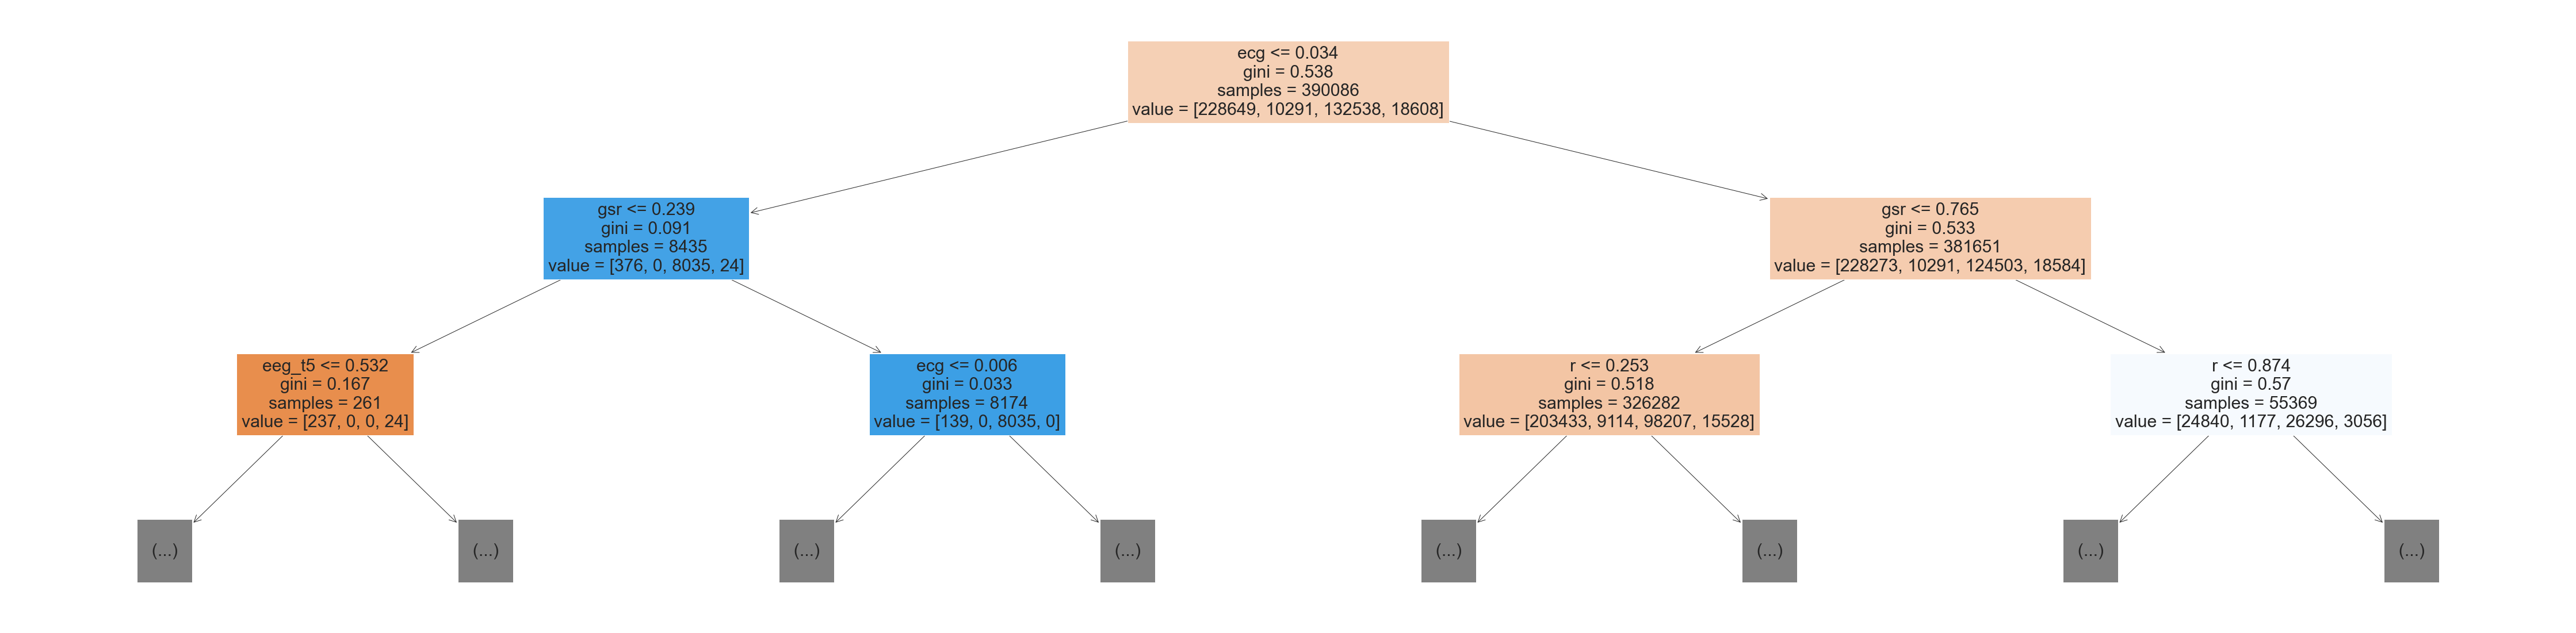

In [81]:
#check the first 2 layers of tree by importing plot_tree and export text functions and specifying max_depth=2
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model_dt, feature_names=X_train.columns, max_depth=2, filled=True);

In [82]:
model_dt.tree_.max_depth

3

### Hyperparameter tuning:
- Hyperparameter tuning is done to show us the settings at which the model has good accuracy between the training and validation datasets. This is to prevent overfitting to the training dataset. 
- In this project, for the decision tree model, we have explored the max_depth and max_leaf_nodes hyperparameters.

In [83]:
def max_depth_score_dt(md):
    """takes a value for max_depth, applies it to the decisiontreeclassifier algorithm 
    and returns the train and val log loss"""
    model_dt = DecisionTreeClassifier(random_state=42, max_depth = md)
    model_dt.fit(X_train, train_targets)
    train_probs_dt = model_dt.predict_proba(X_train)
    train_preds_dt = model_dt.predict(X_train)
    val_probs_dt = model_dt.predict_proba(X_val)
    val_preds_dt = model_dt.predict(X_val)
    train_log_loss_dt = log_loss(train_df['event'], train_probs_dt)
    val_log_loss_dt = log_loss(val_df['event'], val_probs_dt)
    return {'Max Depth': md, 'Training_log_loss': train_log_loss_dt, 'Validation_log_loss': val_log_loss_dt}

In [84]:
#apply the max_depth function to a range of values for max_depth:
%time
md_log_loss_dt_df = pd.DataFrame(max_depth_score_dt(md) for md in range(1, 55, 5))
md_log_loss_dt_df

Wall time: 0 ns


,Max Depth,Training_log_loss,Validation_log_loss
0,1,0.901951,0.905104
1,6,0.740724,0.744491
2,11,0.420933,0.447005
3,16,0.204558,0.339429
4,21,0.105615,0.551499
5,26,0.048392,1.003175
6,31,0.019013,1.417224
7,36,0.006104,1.668420
8,41,0.001466,1.746989
9,46,0.000199,1.768493


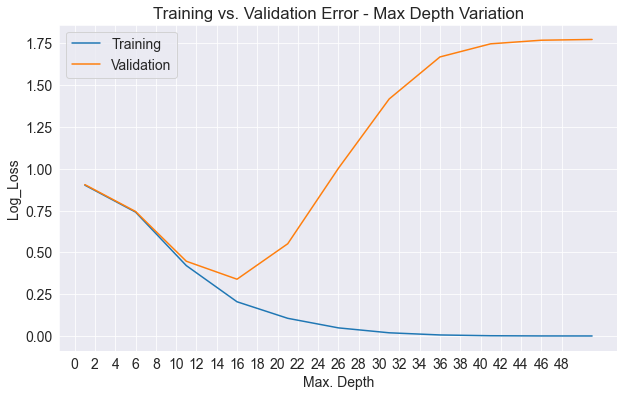

In [86]:
#plot the dataframe:
plt.figure()
plt.plot(md_log_loss_dt_df['Max Depth'], md_log_loss_dt_df['Training_log_loss'])
plt.plot(md_log_loss_dt_df['Max Depth'], md_log_loss_dt_df['Validation_log_loss'])
plt.title('Training vs. Validation Error - Max Depth Variation')
plt.xticks(range(0,50, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Log_Loss')
plt.legend(['Training', 'Validation'])

For the decision tree classifier, it looks like the validation log loss is lowest at max depth of 16.

In [87]:
#Check feature importances to see which features have a higher impact on model accuracy:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_dt.feature_importances_
}).sort_values('importance', ascending=False)


In [88]:
importance_df.head(10)

,feature,importance
21,r,0.411485
20,ecg,0.374308
22,gsr,0.213985
5,eeg_t5,0.000222
12,eeg_fz,0.000000
19,eeg_o2,0.000000
18,eeg_cz,0.000000
17,eeg_c3,0.000000
16,eeg_poz,0.000000
15,eeg_p4,0.000000


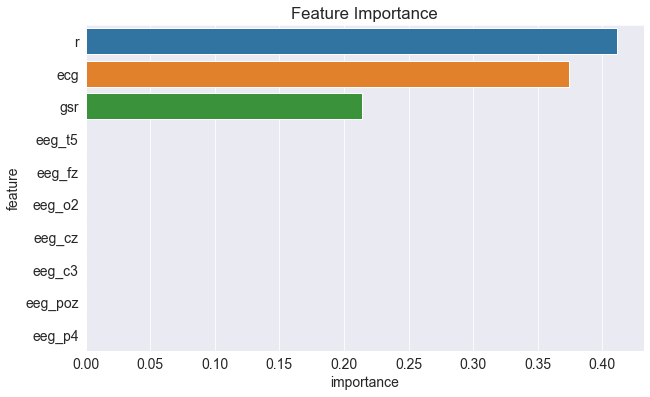

In [89]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [90]:
def max_leaf_nodes_log_loss_dt(mln):
    """takes a value for max_leaf_node, applies it to the decisiontreeclassifier algorithm 
    and returns the train and val log loss"""
    model_dt = DecisionTreeClassifier(random_state=42, max_depth = 16, max_leaf_nodes= mln)
    model_dt.fit(X_train, train_targets)
    train_probs_dt = model_dt.predict_proba(X_train)
    train_preds_dt = model_dt.predict(X_train)
    val_probs_dt = model_dt.predict_proba(X_val)
    val_preds_dt = model_dt.predict(X_val)
    train_log_loss_dt = log_loss(train_df['event'], train_probs_dt)
    val_log_loss_dt = log_loss(val_df['event'], val_probs_dt)
    return {'Max Leaf Nodes': mln, 'Training_log_loss': train_log_loss_dt, 'Validation_log_loss': val_log_loss_dt}

In [95]:
%time
#let's apply the max_leaf_nodes_log_loss function over a range of values for max_leaf_node
mln_log_loss_dt_df = pd.DataFrame(max_leaf_nodes_log_loss_dt(mln) for mln in range(10, 200, 10))
mln_log_loss_dt_df

Wall time: 0 ns


,Max Leaf Nodes,Training_log_loss,Validation_log_loss
0,10,0.807886,0.810937
1,20,0.673305,0.673869
2,30,0.530795,0.533015
3,40,0.465599,0.468815
4,50,0.417213,0.420682
5,60,0.367090,0.371369
6,70,0.350076,0.353636
7,80,0.336985,0.341300
8,90,0.322663,0.326807
9,100,0.308880,0.313662


In [96]:
%time
#seems like the log losses continue to reduce even at 200 max_leaf_nodes. Let's extend the range further
mln_log_loss_dt_df = pd.DataFrame(max_leaf_nodes_log_loss_dt(mln) for mln in range(200, 1000, 100))
mln_log_loss_dt_df

Wall time: 0 ns


,Max Leaf Nodes,Training_log_loss,Validation_log_loss
0,200,0.265667,0.274401
1,300,0.248782,0.262478
2,400,0.237650,0.254516
3,500,0.229273,0.249223
4,600,0.223786,0.249446
5,700,0.220242,0.251879
6,800,0.216766,0.257547
7,900,0.214362,0.267123


In [97]:
# It appears that the val log loss is lowest somewhere between 400 and 600 max leaf node splits. Let's look deeper in that range.
mln_log_loss_dt_df = pd.DataFrame(max_leaf_nodes_log_loss_dt(mln) for mln in range(400, 610, 10))
mln_log_loss_dt_df

,Max Leaf Nodes,Training_log_loss,Validation_log_loss
0,400,0.237650,0.254516
1,410,0.236880,0.254629
2,420,0.235947,0.253894
3,430,0.235445,0.253436
4,440,0.234774,0.252734
5,450,0.234079,0.252127
6,460,0.233013,0.251105
7,470,0.231864,0.251020
8,480,0.230521,0.249887
9,490,0.230168,0.249877


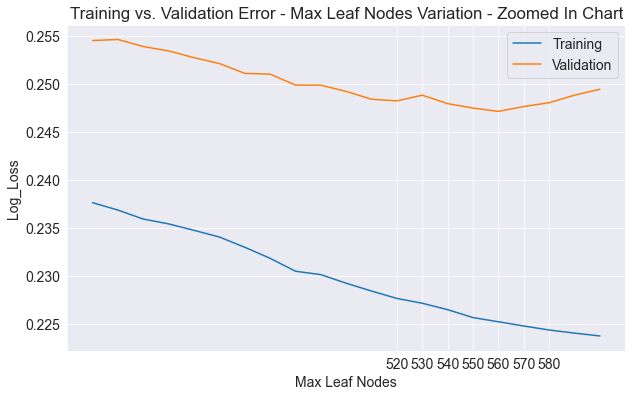

In [98]:
#Let's plot the above dataframe:
plt.figure()
plt.plot(mln_log_loss_dt_df['Max Leaf Nodes'], mln_log_loss_dt_df['Training_log_loss'])
plt.plot(mln_log_loss_dt_df['Max Leaf Nodes'], mln_log_loss_dt_df['Validation_log_loss'])
plt.title('Training vs. Validation Error - Max Leaf Nodes Variation - Zoomed In Chart')
plt.xticks(range(520,590, 10))
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Log_Loss')
plt.legend(['Training', 'Validation'])

It appears that the validation error is lowest at max_leaf_nodes of 570.
We can pick max_depth of 16 and max_leaf_nodes of 570 - to build our model and fit it to the test data. This should get us to a respectable place on the kaggle leaderboard.

In [99]:
#create file with test predictions:
model_dt = DecisionTreeClassifier(random_state=42, max_depth = 16, max_leaf_nodes= 570)
model_dt.fit(X_train, train_targets)
train_probs_dt = model_dt.predict_proba(X_train)
val_probs_dt = model_dt.predict_proba(X_val)
train_log_loss_dt = log_loss(train_df['event'], train_probs_dt)
val_log_loss_dt = log_loss(val_df['event'], val_probs_dt)
print('Training Log Loss   : {}\nValidation Log Loss : {}'.format(round(train_log_loss_dt,3), round(val_log_loss_dt,3)))
test_preds_dt = model_dt.predict_proba(X_test)

Training Log Loss   : 0.225
Validation Log Loss : 0.248


In [100]:
test_preds_dt_df = pd.DataFrame(test_preds_dt, columns = ['A', 'B', 'C', 'D'], index = test_df['id'])
test_preds_dt_df.to_csv('dt_preds.csv')

With the test preds, our public score is 5.52 and private score is 3.765 which means our model accuracy is not good, and nowhere close to the top 30% of the leaderboard. 
<img src="https://imgur.com/uwd44kd.jpeg" style="width: 800px;" align="center"/>

Let's attempt a randomforest classifier next.

In [101]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities


'https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities'

### 6c. Random Forest Classifier
Random forest consists of a large number of decision trees that operate as an ensemble. Each tree spits out a class prediction and the class with the most votes becomes our model’s prediction. For more information on randomforest classifier algorithms, check out this blog by Tony Yiu (17).

Random forest is one of the type of ensemble methods. Ensembling combines several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting) or improve predictions (stacking). Please check out this article by Yamini on Random Forest - Ensemble methods for more information (18).

In [102]:
#import randomforestclassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [103]:
#build a randomforestclassifier (rf) model
model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [104]:
%%time
#fit the training data to the rf model
model_rf.fit(X_train, train_targets)

Wall time: 1min 8s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [105]:
#get the probabilities, predictions and the log loss for the rf model
train_probs_rf = model_rf.predict_proba(X_train)
train_preds_rf = model_rf.predict(X_train)
val_probs_rf = model_rf.predict_proba(X_val)
val_preds_rf = model_rf.predict(X_val)
print("Training Log Loss: {}".format(log_loss(train_targets, train_probs_rf)))
print("Validation Log Loss: {}".format(log_loss(val_targets, val_probs_rf)))

Training Log Loss: 0.0701866584301308
Validation Log Loss: 0.24864440917918693


In [106]:
#make a new function for calculating training and val log losses when provided a max_depth hyperparameter
def max_depth_score_rf(md):
    model_rf = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth = md)
    model_rf.fit(X_train, train_targets)
    train_probs_rf = model_rf.predict_proba(X_train)
    train_preds_rf = model_rf.predict(X_train)
    val_probs_rf = model_rf.predict_proba(X_val)
    val_preds_rf = model_rf.predict(X_val)
    train_log_loss_rf = log_loss(train_df['event'], train_probs_rf)
    val_log_loss_rf = log_loss(val_df['event'], val_probs_rf)
    return {'Max Depth': md, 'Training_log_loss': train_log_loss_rf, 'Validation_log_loss': val_log_loss_rf}

In [107]:
#create a dataframe to check log loss variation with change in max_depth
%time
md_log_loss_rf_df = pd.DataFrame(max_depth_score_rf(md) for md in range(1, 55, 5))
md_log_loss_rf_df

Wall time: 0 ns


,Max Depth,Training_log_loss,Validation_log_loss
0,1,0.908667,0.911956
1,6,0.821262,0.825366
2,11,0.685124,0.696741
3,16,0.517009,0.552349
4,21,0.332295,0.406143
5,26,0.217548,0.336399
6,31,0.134377,0.282563
7,36,0.098471,0.265080
8,41,0.081674,0.254602
9,46,0.075343,0.251685


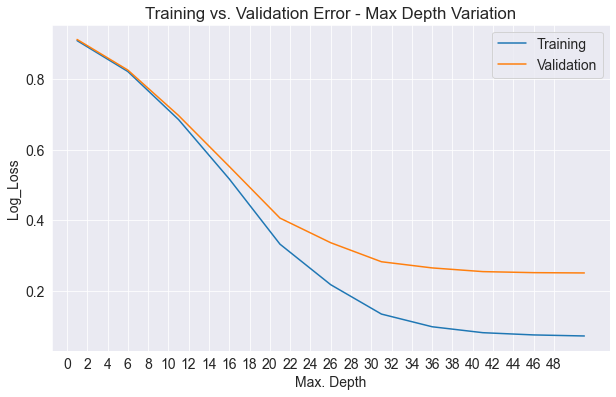

In [109]:
plt.figure()
plt.plot(md_log_loss_rf_df['Max Depth'], md_log_loss_rf_df['Training_log_loss'])
plt.plot(md_log_loss_rf_df['Max Depth'], md_log_loss_rf_df['Validation_log_loss'])
plt.title('Training vs. Validation Error - Max Depth Variation')
plt.xticks(range(0,50, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Log_Loss')
plt.legend(['Training', 'Validation'])

It appears that after max_depth of 41, there is no reduction in validation error. 

In [112]:
#get the train and val log loss at max_depth = 41
model_rf = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth = 41).fit(X_train, train_targets)
train_probs_rf = model_rf.predict_proba(X_train)
val_probs_rf = model_rf.predict_proba(X_val)
train_log_loss_rf = log_loss(train_df['event'], train_probs_rf)
val_log_loss_rf = log_loss(val_df['event'], val_probs_rf)
print('Training_log_loss: {} \nValidation_log_loss:{}'.format(train_log_loss_rf, val_log_loss_rf))

Training_log_loss: 0.08167437454670805 
Validation_log_loss:0.2546021570858416


In [113]:
#create test predictions file:
test_preds_rf = model_rf.predict_proba(X_test)
test_preds_rf_df = pd.DataFrame(test_preds_rf, columns = ['A', 'B', 'C', 'D'], index = test_df['id'])
test_preds_rf_df.to_csv('rf_preds.csv')

In [114]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities


'https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities'

After the test preds were uploaded to Kaggle and evaluated, it returned a private score of 0.61692 and a public score of 0.76055. This is a significant improvement from the previous submission, and puts us at 79th rank. This is still not in the top 30% though. We can try to tune the models and improve accuracy. But for the scope of this project, I would like to try and explore another type of classification model. Let's try gradient boosting with XGBoost.

### 6d. Gradient boosting with XGB classifier



Gradient boosting refers to a class of ensembling machine learning techniques that can be used for classification or regression modeling problems. Ensembles are constructed from decisin tree models. Trees are added one at a time to the ensemble to fit and correct the prediction errors made by prior models. Models are git using any arbitrary differentiable loss function and gradient descnet optimization algorithm (19).

Extreme gradient boosting is an efficient open-source implementation of the gradient boosting algorithm developed by Tianqi Chen and described by Chen and Carlos Guestrin in 2016 (20). Research has shown XGB to have higher execution speed and model accuracy than other gradient boosting ensembling algorithms(21).

In [115]:
#import xgbclassifier
from xgboost import XGBClassifier

In [116]:
#build a model without any hyperparams and check the log loss for train and val datasets
%%time
model_sm = XGBClassifier(random_state=42, n_jobs=-1)
model_sm.fit(X_train_sm, train_targets_sm)
train_probs_sm = model_sm.predict_proba(X_train_sm)
train_preds_sm = model_sm.predict(X_train_sm)
val_probs = model_sm.predict_proba(X_val)
val_preds = model_sm.predict(X_val)
print("Training Log Loss: {}".format(log_loss(train_targets_sm, train_probs_sm)))
print("Validation Log Loss: {}".format(log_loss(val_targets, val_probs)))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Log Loss: 0.22751751589255514
Validation Log Loss: 0.3341869562986603
Wall time: 7min 9s


In [140]:
%%time
#build a model without any hyperparams and check the log loss for train and val datasets

model_xgb = XGBClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, train_targets)
train_probs = model.predict_proba(X_train)
train_preds = model.predict(X_train)
val_probs = model.predict_proba(X_val)
val_preds = model.predict(X_val)
print("Training Log Loss: {}".format(log_loss(train_targets, train_probs)))
print("Validation Log Loss: {}".format(log_loss(val_targets, val_probs)))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:33:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Log Loss: 0.14593856161410265
Validation Log Loss: 0.16518923557340068
Wall time: 4min 35s


In [141]:
#create test predictions file:
test_preds_xgb = model.predict_proba(X_test)
test_preds_xgb_df = pd.DataFrame(test_preds_xgb, columns = ['A', 'B', 'C', 'D'], index = test_df['id'])
test_preds_xgb_df.to_csv('xgb_preds.csv')

With the base xgb model, we are at a private score of 1.226 and public score of 0.833. That puts us at a leaderboard ranking of 126 out of 178 on the leaderboard.

Let's try adjusting the max_depth hyperparameter:

In [117]:
#create a function to calculate log loss given max_depth value
def max_depth_score(md):
    model = XGBClassifier(random_state=42, n_jobs=-1, max_depth = md)
    model.fit(X_train, train_targets)
    XGB_train_probs = model.predict_proba(X_train)
    XGB_val_probs = model.predict_proba(X_val)
    train_log_loss = log_loss(train_df['event'], XGB_train_probs)
    val_log_loss = log_loss(val_df['event'], XGB_val_probs)
    return {'Max Depth': md, 'Training_log_loss': train_log_loss, 'Validation_log_loss': val_log_loss}

In [121]:
#Let's check the log loss at a max_epth range of 0 to 50.
md_log_loss_df = pd.DataFrame(max_depth_score(md) for md in range(0, 55, 5))
md_log_loss_df

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:11:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:35:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Max Depth,Training_log_loss,Validation_log_loss
0,0,0.920932,0.924173
1,5,0.181760,0.194941
2,10,0.054472,0.107715
3,15,0.010705,0.090533
4,20,0.002922,0.085309
5,25,0.001710,0.085510
6,30,0.001394,0.086591
7,35,0.001198,0.087312
8,40,0.001136,0.088641
9,45,0.001049,0.089711


We can see that at max_depth of 50, the model has overfitted to the training data. The validation log loss is 80 times higher. From the table above, we can also see that the training and validation log loss really begin to diverge after a max_depth of 5. 

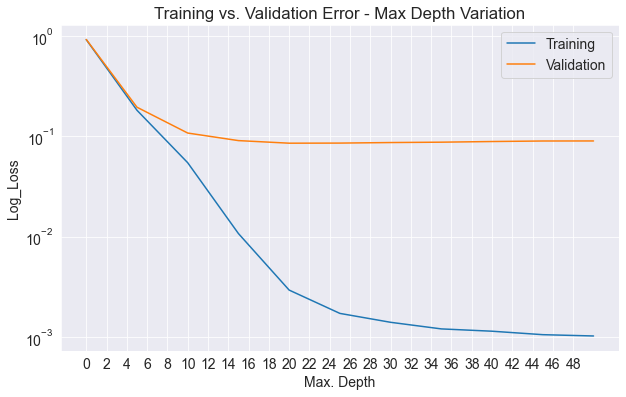

In [128]:
plt.figure()
plt.plot(md_log_loss_df['Max Depth'], md_log_loss_df['Training_log_loss'])
plt.plot(md_log_loss_df['Max Depth'], md_log_loss_df['Validation_log_loss'])
plt.title('Training vs. Validation Error - Max Depth Variation')
plt.xticks(range(0,50, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Log_Loss')
plt.yscale('log')
plt.legend(['Training', 'Validation'])

Although the validation error levels off at a max_depth of 16, it is better to try a max_depth of 4. There are other hyperparamters to try as well - such as n_estimators and learning_rate. Because the kaggle scores vary widely with the modulation of any of the hyperparameters, it was decided that each modulation be manually run. 

At first, max_depth was modulated between 3 to 5, and the best test score was achieved at a max_depth of 4. 
Then, keeping max_depth constant at 4, the n_estimators parameter was tested with a range of 5 to 30. The best score was achieved at n_estimators of 11.
After that, learning rate was modulated between 0.3 and 0.6. The best result was achieved at a learning rate of 0.35. 

So, the model with hyperparameters for the best model built in this project are:
XGBClassifier(random_state=42, n_jobs=-1, n_estimators=11, max_depth=4, learning_rate = 0.35).

Here's how I kept track of the modulations I was making: ([Link](https://docs.google.com/spreadsheets/d/1vtkwnNJ7zhAsYtocaOv0FtFhT14i-MgCoXuBkOgzhcs/edit#gid=0))

<img src="https://imgur.com/xVa1vsN.jpeg" style="width: 1000px;" align="center"/>


In [145]:
%%time
#re-build the model with the best hyperparams:
model_XGB = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=11, max_depth=4, learning_rate = 0.35)
model_XGB.fit(X_train, train_targets)
xgb_train_probs = model_XGB.predict_proba(X_train)
xgb_val_probs = model_XGB.predict_proba(X_val)
print("Training Log Loss: {}".format(log_loss(train_targets, xgb_train_probs)))
print("Validation Log Loss: {}".format(log_loss(val_targets, xgb_val_probs)))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Log Loss: 0.605229297054051
Validation Log Loss: 0.6070281317251526
Wall time: 15.9 s


In [144]:
#create test predictions file:
test_preds_xgb = model_XGB.predict_proba(X_test)
test_preds_xgb_df = pd.DataFrame(test_preds_xgb, columns = ['A', 'B', 'C', 'D'], index = test_df['id'])
test_preds_xgb_df.to_csv('xgb_preds.csv')

The above model not only gave us training and validation log losses of 0.605 and 0.607 which were very close, but also a test log loss of 0.657, which is comparable to the training and validation log losses. Thus, it can be concluded that this model is fairly accurate in its representation of the accuracy on the test dataset. This model also brings us to a rank of 47 out of 178 on the leaderboard, which is within the top 30 percentile.

In [126]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities


'https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities'

## <font color=brown> 7. Summary and conclusion:
- This is a classification problem and multiclass log loss needed to be used. 
- The validation score is not matching the test scores, so the deviation needs to be identified and addressed. 
- XGB score was far better than a basic logistic regression score. 

## <font color=brown> 8. Future work:

- Try to make it to the top 10% of the leaderboard
- Create new features which could be more relevant to the classification model
- Tune hyperparameters with random forests and other models to improve accuracy

## <font color=brown> 9. References:

    
1. [Reducing Commercial Aviation Fatalities - Kaggle Project](https://www.kaggle.com/competitions/reducing-commercial-aviation-fatalities)

2. [Airplane Failure Rates](https://www.boeing.com/commercial/aeromagazine/articles/qtr_2_07/article_03_2.html#:~:text=Approximately%2080%20percent%20of%20airplane,to%20machine%20(equipment)%20failures) 

3. [Aviation safety trends]((https://landing.redbirdflight.com/posts/ga-safety-trends-what-should-we-worry-about) 
    
4. [Quora article on safer flights](https://www.quora.com/How-do-I-have-safer-flights).

5. [Zero To Datascience Bootcamp by Jovian - Logistic regression](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/logistic-regression-for-classification)
   
6. [Zero To Datascience Bootcamp by Jovian - Gradient boosting](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/gradient-boosting-machines-with-xgboost)

7. [SMOTE with LGBM](https://www.kaggle.com/code/ashishpatel26/smote-with-model-lightgbm)
    
8. [EDA and LGBM baseline](https://www.kaggle.com/code/theoviel/starter-code-eda-and-lgbm-baseline/data)
    
9. [Notebook by Kamal Chirang](https://www.kaggle.com/code/kamalchhirang/forgot-to-shuffle-the-data-while-splitting-boom/script?scriptVersionId=10364940)

10. [SKLearn pre-processing](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    
11. [Towards data science - SMOTE](https://towardsdatascience.com/smote-fdce2f605729)
    
12. [Kaggle Notebook by Ashish Patel](https://www.kaggle.com/code/ashishpatel26/smote-with-model-lightgbm)
    
13. [Supervised Learning by Hoss Belyadi, Alireza Haghighat](https://www.sciencedirect.com/topics/computer-science/logistic-regression#:~:text=Logistic%20regression%20is%20a%20process,%2Fno%2C%20and%20so%20on)
    
14. [Linear Regression - Detailed Overview by Saishruthi Swaminathan](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
    
15. [SMOTE for oversampling](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
    
16. [Decision Tree Classifier](https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575)
    
17. [Understanding Random Forests - by Tony Yu](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

18. [Random Forests - Ensemble Methods by Yamini](https://medium.com/geekculture/random-forest-ensemble-method-860aaf4fcd16#:~:text=One%20of%20the%20advanced%20techniques,combine%20to%20become%20Random%20Forest)
    
19. [Gradient boosting with Python](https://machinelearningmastery.com/gradient-boosting-machine-ensemble-in-python/)
    
20. [Gradient boosting by Chen and Guestrin](https://arxiv.org/abs/1603.02754)
    
21. [Extreme gradient boosting with Python](https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/)

In [134]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities


'https://jovian.ai/tejasvi-sadasivuni/project-3-machine-learning-reducing-commercial-aviation-fatalities'